In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import sys
import sklearn
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

In [2]:
t = tf.constant("cafe")
print(t)
print(tf.strings.length(t))
print(tf.strings.unicode_decode(t, "utf8"))

tf.Tensor(b'cafe', shape=(), dtype=string)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([ 99  97 102 101], shape=(4,), dtype=int32)


In [3]:
# ragged tensor（不规则的张量）
r = tf.ragged.constant([[11,22], [23, 1,3], [], [33]])
print(r)
print(r[1])
print(r[1:2])

<tf.RaggedTensor [[11, 22], [23, 1, 3], [], [33]]>
tf.Tensor([23  1  3], shape=(3,), dtype=int32)
<tf.RaggedTensor [[23, 1, 3]]>


In [5]:
# ops on ragger tensor
r2 = tf.ragged.constant([[22222]])
print(tf.concat([r, r2], axis = 0))

<tf.RaggedTensor [[11, 22], [23, 1, 3], [], [33], [22222]]>


In [6]:
print(r.to_tensor())

tf.Tensor(
[[11 22  0]
 [23  1  3]
 [ 0  0  0]
 [33  0  0]], shape=(4, 3), dtype=int32)


In [8]:
# Variable（变量）
d1 = tf.Variable([[33,22], [11,2], [0, 12]])
print(2*d1)

tf.Tensor(
[[66 44]
 [22  4]
 [ 0 24]], shape=(3, 2), dtype=int32)


In [6]:
s5 = tf.SparseTensor(indices = [[0,1], [1,2], [2,3]],
                    values = [1,2,3],
                    dense_shape=[3,4])
print(s5)
s6 = tf.sparse.reorder(s5)
print(tf.sparse.to_dense(s6))

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 2]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 2 3], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))
tf.Tensor(
[[0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]], shape=(3, 4), dtype=int32)


In [6]:

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [7]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 7)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

print("x_train shape:", x_train.shape, "x_train_scaled shape:", x_train_scaled.shape)

x_train shape: (11610, 8) x_train_scaled shape: (11610, 8)


In [31]:
def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))


model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = x_train.shape[1:]),
    keras.layers.Dense(1)
    ])


# 
model.compile(loss = customized_mse, optimizer = "adam", metrics=["mean_squared_error"])


# 回调函数试验
logdir = ".\callbacks"
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

# 回调函数
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2),
]


In [32]:
history = model.fit(x_train_scaled, y_train, epochs=15, 
                    validation_data=(x_valid_scaled, y_valid),
                   callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/15
11610/11610 [==============================] - 1s 99us/sample - loss: 1.5032 - mean_squared_error: 1.5032 - val_loss: 0.6828 - val_mean_squared_error: 0.6828
Epoch 2/15
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5996 - mean_squared_error: 0.5996 - val_loss: 0.5170 - val_mean_squared_error: 0.5170
Epoch 3/15
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4710 - mean_squared_error: 0.4710 - val_loss: 0.4354 - val_mean_squared_error: 0.4354
Epoch 4/15
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4185 - mean_squared_error: 0.4185 - val_loss: 0.4121 - val_mean_squared_error: 0.4121
Epoch 5/15
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4014 - mean_squared_error: 0.4014 - val_loss: 0.3996 - val_mean_squared_error: 0.3996
Epoch 6/15
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3928 - mean_squared_err

In [2]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

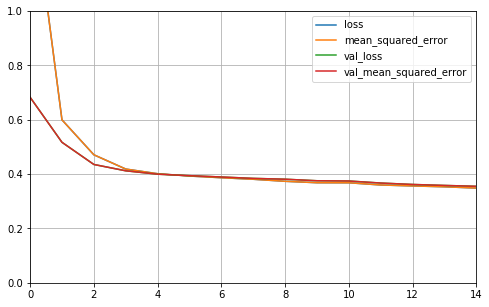

In [33]:
plot_learning_curves(history)

In [37]:
layer = tf.keras.layers.Dense(100, input_shape=(None, 5))
layer(tf.zeros([10,5]))
print(layer.trainable_variables)

[<tf.Variable 'dense_21/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[-0.04077737,  0.12759791, -0.0360046 , -0.17299461, -0.00453909,
        -0.23435737, -0.1162171 ,  0.09601726, -0.17939737, -0.19475701,
        -0.12813786, -0.0348762 ,  0.20201968,  0.04991306, -0.06547526,
        -0.07242572, -0.07661504,  0.14616518,  0.15353604,  0.09610189,
         0.2167864 , -0.14765652,  0.20547967,  0.21656646, -0.05769914,
         0.01013711, -0.18946284, -0.23511857, -0.02800086, -0.21156886,
         0.13518326, -0.21437   ,  0.11601745, -0.05467544, -0.14354908,
         0.22663905, -0.05260204, -0.13402836, -0.05445732,  0.04234998,
         0.17464228,  0.20005287,  0.1576757 ,  0.2377759 ,  0.20706777,
         0.01913594,  0.09009318, -0.00030999, -0.22128086, -0.0381019 ,
        -0.12589335,  0.21522622,  0.05416717,  0.11633269, -0.15403779,
        -0.05978355, -0.12514858, -0.02357759, -0.04032849,  0.13483162,
        -0.08848839, -0.23648788,  0.1000355 , -0.026

### 3.6

In [20]:
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation = None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        """构建layer所需的参数"""
        self.kernel = self.add_weight(name = 'kernel',
                                      shape = (input_shape[1], self.units),
                                      initializer = 'uniform',
                                      trainable = True)
        self.bias = self.add_weight(name = 'bias',
                                    shape = (self.units, ),
                                    initializer = 'zeros',
                                    trainable = True)
        super(CustomizedDenseLayer, self).build(input_shape)
        
    def call(self, x):
        """正向计算"""
        return self.activation(x @ self.kernel + self.bias)
    
    def get_config(self):
        base_config = super().get_config()
        return dict(list(base_config.items()))
    

def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))


model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu', input_shape = x_train.shape[1:]),
    CustomizedDenseLayer(1)
    ])


# 
model.compile(loss = customized_mse, optimizer = "adam", metrics=["mean_squared_error"])


# 回调函数试验
logdir = ".\callbacks"
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

# 回调函数
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2),
]

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_8 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_9 (Cu (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x_train_scaled, y_train, epochs=15, 
                    validation_data=(x_valid_scaled, y_valid),
                   callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/15
11610/11610 [==============================] - 1s 109us/sample - loss: 2.1400 - mean_squared_error: 2.1400 - val_loss: 0.6380 - val_mean_squared_error: 0.6380
Epoch 2/15
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5319 - mean_squared_error: 0.5319 - val_loss: 0.4637 - val_mean_squared_error: 0.4637
Epoch 3/15
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4384 - mean_squared_error: 0.4384 - val_loss: 0.4277 - val_mean_squared_error: 0.4277
Epoch 4/15
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4191 - mean_squared_error: 0.4191 - val_loss: 0.4157 - val_mean_squared_error: 0.4157
Epoch 5/15
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4084 - mean_squared_error: 0.4084 - val_loss: 0.4052 - val_mean_squared_error: 0.4052
Epoch 6/15
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4008 - mean_squared_er

#### lambda

In [24]:
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))

## tf.function && Autograph

In [29]:
def scaled_elu(z, scale = 1.0, alpha = 1.0):
    is_positive = tf.greater_equal(z, 0.0)
    return scale * tf.where(is_positive, z, alpha * tf.nn.elu(z))

print(scaled_elu(tf.constant(-3.)))

tf.Tensor(-0.95021296, shape=(), dtype=float32)


In [30]:
tf_scaled_elu = tf.function(scaled_elu)

In [31]:
tf_scaled_elu

In [34]:
aa = tf_scaled_elu.get_concrete_function(tf.TensorSpec([2], tf.float32))
aa

tf.Tensor([1 2], shape=(2,), dtype=int32) tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor([3 4], shape=(2,), dtype=int32) tf.Tensor(b'sdk', shape=(), dtype=string)
tf.Tensor([ 12 334], shape=(2,), dtype=int32) tf.Tensor(b'jpg', shape=(), dtype=string)
{'feature': <tf.Tensor: id=32678, shape=(2,), dtype=int32, numpy=array([1, 2])>, 'label': <tf.Tensor: id=32679, shape=(), dtype=string, numpy=b'cat'>}
{'feature': <tf.Tensor: id=32680, shape=(2,), dtype=int32, numpy=array([3, 4])>, 'label': <tf.Tensor: id=32681, shape=(), dtype=string, numpy=b'sdk'>}
{'feature': <tf.Tensor: id=32682, shape=(2,), dtype=int32, numpy=array([ 12, 334])>, 'label': <tf.Tensor: id=32683, shape=(), dtype=string, numpy=b'jpg'>}
